# City Comparison of Vancouver - Paris

## INTRODUCTION SECTION

### Idea
With many baby boomers entering retirement and the world becoming more accessible through globalization, people have more options on where they decide to live and retire. 
This notebook will analyze where one might want to settle in and retire through a city comparison in multiple dimensions.

I've selected two very popular destinations for city dwellers: Vancouver, Canada and Paris, France.

**Problem**: These cities are arguably two of the best cities in the world. How do we objectively decide which one is the best place to live?

**Goal**: This notebook aims to help people better understand what both cities have to offer in a data-supported analysis.

### Vancouver
- Vancouver has the highest population density in Canada, with over 5,400 people per square kilometre.
- Because of its proximity to both mountains and ocean, Vancouver is famous for offering every kind of outdoor sport and adventure, from skiing and snow sports in the winter to kayaking and water sports in the summer, and hiking, camping, and biking year-round. Also fishing, scenic golf courses, and mountain ziplining.
- Vancouver is consistently named as one of the top five worldwide cities for livability and quality of life.

### Paris
- Paris is the capital and most populous city of France, with an estimated population of 2,175,601 residents as of 2018, in an area of more than 105 square kilometres (41 square miles).
- In 2018, Paris was the second most expensive city in the world, after Singapore.
- Since the 17th century, Paris has been one of Europe's major centres of finance, diplomacy, commerce, fashion, gastronomy, science and arts.
- It was ranked as the second most visited travel destination in the world in 2019, after Bangkok and just ahead of London.

### Similarities
- Both are the most expensive cities to live in within their respective countries.
- Both cities have the highest population density in their respective countries.
- Both have an overall climate throughout the year as mild and moderately wet.


_https://www.tourismvancouver.com/_; 
_https://en.wikipedia.org/wiki/Vancouver_; 
_https://en.wikipedia.org/wiki/Paris_; 
_https://www.lonelyplanet.com/france/paris_

## DATA SECTION

## Data Dimensions

- Neighborhoods & Locations: 

| Postal Code | City | Neighborhood | Neighborhood Latitude | Neighborhood Longitude |
| --- | --- | --- | --- | --- |
| V6B | Vancouver | (NE Downtown / Gastown / Harbour Centre / International Village / Victory Square / Yaletown) | -43.55555 | 75.55555 |
| V6C | Vancouver | Waterfront / Coal Harbour / Canada Place) | -43.55555 | 75.5556 |

- Venues: using Foursquare's location data to identify and view the venue counts and their categories. An ideal location is one that has many options for entertainment, food, and more.

| Postal Code | Venue | Venue Latitude | Venue Longitude | Venue Category |
| --- | --- | --- | --- | --- |
| V6B | Sample Coffee | -44.55555 | 75.55555 | Coffee Shop |
| 75001 | Sample Grocery | -44.55555 | 75.55555 | Grocery |

- Population & Density: There are correlations between population, population density and increase of options within a city.
- Number of transit / subway lines: The more transit lines a city has, the easier it is to move around.
- Cost of living: It is important for retirees to understand the cost of living to maintain their selected lifestyle.

| PostalCode | Cost Of Living | Population Density | Transit |
| --- | --- | --- | --- |
| Vancouver | 2200 | 5500 | 2 |
| Paris | 2500 | 21000 | 6 |

*Demonstrative data shown above.*

## METHODOLOGY SECTION

1. Ingested, structured and cleaned the neighborhood data. Filtered Vancouver neighborhoods to only ones with Vancouver as part of the city.
2. Obtained the latituted and longitude of Vancouver neighborhoods using name and postal code. Paris source already has their coordinates included.
3. Visualized and verified the locations of the neighborhoods.
4. Collected the nearest venues of Vancouver neighborhoods
5. Simplify the categories of venues for improved analysis then visualize
6. Use K-Means unsupervised clustering for Vancouver neighborhoods
7. Do 4 & 5 for Paris neighborhoods
8. Visualize the venue counts through Map markers
9. Create formula to Rank Neighborhoods based on population, venue counts, and cost of living
10. Visualize the Score/Rank through Map markers
11. Conclude

## RESULTS AND ANALYSIS SECTION

In [26]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

### Ingest and Structure Neighborhood Data

In [27]:
# Ingest and structure Vancouver Neighborhood data
url_van = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V'
html_text = requests.get(url_van).text
soup = BeautifulSoup(html_text, 'html.parser')
# print(soup.prettify())

In [28]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
#         print(row.b.text)
        cell['Postal Code'] = row.b.text
        
#         print(row.a.text)
        cell['City'] = row.a.text
        numChars = len(row.a.text)
        
#         print(row.span.text[numChars:])
        cell['Neighborhood'] = (row.span.text[numChars:])
        table_contents.append(cell)
# print(table_contents)

dfBcAll = pd.DataFrame(table_contents)
dfVan = dfBcAll[dfBcAll['City'].str.contains("Vancouver")]
# dfVan.shape

In [29]:
#Combine same postal codes and city together
dfVan = dfVan.groupby(['Postal Code','City'])['Neighborhood'].apply(', '.join).reset_index()
# dfVan

In [30]:
# Ingest Paris Neighborhood data
dfPar = pd.read_csv('Paris_Postal_Codes.csv')

In [31]:
import geopy
from geopy.geocoders import Nominatim
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="van_explorer")
location = geolocator.geocode(address)
van_latitude = location.latitude
van_longitude = location.longitude
print('The geograpical coordinate of Vancouver City are {}, {}.'.format(van_latitude, van_longitude))

The geograpical coordinate of Vancouver City are 49.2608724, -123.1139529.


In [32]:
geolocator = Nominatim(user_agent="van_explorer")

arr_contents = []
for index, row in dfVan.iterrows():
    row_new = {}
    
    address = row[1] + ', BC, ' + row[0]
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
#         print('The geograpical coordinate of Vancouver {} are {}, {}.'.format(address, latitude, longitude))
        row_new['City'] = row[1]
        row_new['Postal Code'] = row[0]
        row_new['Neighborhood'] = row[2]
        row_new['Latitude'] = latitude
        row_new['Longitude'] = longitude
        arr_contents.append(row_new)
    except:
        print('Missing lat-long of {}, {}.'.format(row[2], address))

dfVanLoc = pd.DataFrame(arr_contents)
# dfVanLoc.head()

Missing lat-long of (East Mount Pleasant), Vancouver, BC, V5T.
Missing lat-long of (West Mount Pleasant / West Riley Park-Little Mountain), Vancouver, BC, V5Y.
Missing lat-long of (NW Dunbar-Southlands / Chaldecutt / South University Endowment Lands), Vancouver, BC, V6S.
Missing lat-long of Outer East, North Vancouver (district municipality), BC, V7G.
Missing lat-long of Inner East, North Vancouver (district municipality), BC, V7H.
Missing lat-long of East Central, North Vancouver (district municipality), BC, V7J.
Missing lat-long of North Central, North Vancouver (district municipality), BC, V7K.
Missing lat-long of Northwest Central, North Vancouver (district municipality), BC, V7N.
Missing lat-long of Northwest, North Vancouver (district municipality), BC, V7R.
Missing lat-long of North, West Vancouver, BC, V7S.
Missing lat-long of Southeast, West Vancouver, BC, V7T.
Missing lat-long of West, West Vancouver, BC, V7W.


In [33]:
# Adjusted to be closer to Davie Village
dfVanLoc.loc[dfVanLoc['Neighborhood'] == '(SE West End / Davie Village)', 'Latitude'] = 49.282937
dfVanLoc.loc[dfVanLoc['Neighborhood'] == '(SE West End / Davie Village)', 'Longitude'] = -123.135453

### Visualizing Neighborhoods on a Map

In [34]:
import folium # map rendering library

In [35]:
# create map of Vancouver using latitude and longitude values
map_vancouver = folium.Map(location=[van_latitude, van_longitude], zoom_start=10)

# add markers to map
for lat, lng, city, neighborhood in zip(dfVanLoc['Latitude'], dfVanLoc['Longitude'], dfVanLoc['City'], dfVanLoc['Neighborhood']):
    label = '{}, {}'.format(neighborhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver

In [36]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[ dfPar.iloc[0]['Latitude'], dfPar.iloc[0]['Longitude'] ], zoom_start=10)

# add markers to map
for lat, lng, city, neighborhood in zip(dfPar['Latitude'], dfPar['Longitude'], dfPar['City'], dfPar['Neighborhood']):
    label = '{}, {}'.format(neighborhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [37]:
CLIENT_ID = 'client_id' # your Foursquare ID
CLIENT_SECRET = 'client_secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

# print('Your credentials:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
vancouver_venues = getNearbyVenues(dfVanLoc['Neighborhood'], dfVanLoc['Latitude'], dfVanLoc['Longitude'])
# print(vancouver_venues.shape)
# vancouver_venues.head()

#### Simplifying the Venue Categories for better analysis

Too many variables make it hard to analyze the data and do a comparison between neighborhoods. Large categories have been created to easier understand the major factors that are comparable between each area.

In [40]:
def simplifyCategories(df):
    arr_contents = []
    for index, row in df.iterrows():
        row_new = {}
    #     print (row['Venue Category'])

        row_new['Neighborhood'] = row['Neighborhood']
        row_new['Neighborhood Latitude'] = row['Neighborhood Latitude']
        row_new['Neighborhood Longitude'] = row['Neighborhood Longitude']
        row_new['Venue'] = row['Venue']
        row_new['Venue Latitude'] = row['Venue Latitude']
        row_new['Venue Longitude'] = row['Venue Longitude']
        row_new['Venue Category'] = row['Venue Category']

        if ( "Restaurant" in row['Venue Category'] or 
            "Burger " in row['Venue Category'] or 
            "Sandwich " in row['Venue Category'] or 
            "Breakfast Spot" in row['Venue Category'] or 
            "Pizza Place" in row['Venue Category'] or 
            "Diner" in row['Venue Category'] or 
            "Steakhouse" in row['Venue Category'] or 
            "Cocktail Bar" in row['Venue Category'] or 
            "Food" in row['Venue Category'] or 
            "Salad Place" in row['Venue Category'] or 
            "Fried Chicken" in row['Venue Category'] or 
            "Cafeteria" in row['Venue Category'] or 
            "Souvlaki Shop" in row['Venue Category'] or 
            "Bistro" in row['Venue Category'] or 
            "Food Truck" in row['Venue Category'] or 
            "Noodle House" in row['Venue Category'] or 
            "Fish & Chips " in row['Venue Category'] or 
            "Food Court " in row['Venue Category'] or 
            "Hot Dog " in row['Venue Category'] or 
            "Poke Place" in row['Venue Category'] or 
            "Brasserie" in row['Venue Category'] or 
            "Creperie" in row['Venue Category'] or 
            "Taco Place" in row['Venue Category'] or 
            "Lyonese Bouchon" in row['Venue Category'] or 
            "Garden" in row['Venue Category'] or 
            "Burrito " in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Restaurant'
        elif ( "Café" in row['Venue Category'] or
            "Smoothie Shop" in row['Venue Category'] or 
            "Dessert Shop" in row['Venue Category'] or 
            "Juice Bar" in row['Venue Category'] or 
            "Bakery" in row['Venue Category'] or 
            "Tea Room" in row['Venue Category'] or 
            "Ice Cream " in row['Venue Category'] or 
            "Bagel Shop" in row['Venue Category'] or 
            "Coffee Shop" in row['Venue Category'] or 
            "Bubble Tea" in row['Venue Category'] or 
            "Frozen Yogurt" in row['Venue Category'] or 
            "Cheese Shop" in row['Venue Category'] or 
            "Snack Place" in row['Venue Category'] or 
            "Pastry Shop" in row['Venue Category'] or 
            "Chocolate Shop" in row['Venue Category'] or 
            "Cupcake" in row['Venue Category'] or 
            "Donut" in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Snacks or Coffee'
        elif ( "Zoo " in row['Venue Category'] or
            "Public Art" in row['Venue Category'] or 
            "Community Center" in row['Venue Category'] or 
            "Amphitheater" in row['Venue Category'] or 
            "Theme Park" in row['Venue Category'] or 
            "Theater" in row['Venue Category'] or 
            "Exhibit" in row['Venue Category'] or 
            "Art Gallery" in row['Venue Category'] or 
            "Fair" in row['Venue Category'] or 
            "Waterfront" in row['Venue Category'] or 
            "Museum" in row['Venue Category'] or 
            "Event Service" in row['Venue Category'] or 
            "Concert Hall" in row['Venue Category'] or 
            "Hockey Arena" in row['Venue Category'] or 
            "Plaza" in row['Venue Category'] or 
            "Park" in row['Venue Category'] or 
            "Soccer Field" in row['Venue Category'] or 
            "Sculpture Garden" in row['Venue Category'] or 
            "Aquarium" in row['Venue Category'] or 
            "Water Park" in row['Venue Category'] or 
            "Historic Site" in row['Venue Category'] or 
            "Music Venue" in row['Venue Category'] or 
            "Outdoor Sculpture" in row['Venue Category'] or 
            "Beach" in row['Venue Category'] or 
            "Pier" in row['Venue Category'] or 
            "Jazz Club" in row['Venue Category'] or 
            "Planetarium" in row['Venue Category'] or 
            "Spa" in row['Venue Category'] or 
            "Scenic Lookout" in row['Venue Category'] or 
            "Fountain" in row['Venue Category'] or 
            "Botanical Garden" in row['Venue Category'] or 
            "Waterfall" in row['Venue Category'] or 
            "Speakeasy" in row['Venue Category'] or 
            "Escape Room" in row['Venue Category'] or 
            "Resort" in row['Venue Category'] or 
            "Cultural Center" in row['Venue Category'] or 
            "Nightclub" in row['Venue Category'] or 
            "Comedy Club" in row['Venue Category'] or 
            "Memorial Site" in row['Venue Category'] or 
            "Pool" in row['Venue Category'] or 
            "Bridge" in row['Venue Category'] or 
            "Event Space" in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Attraction'
        elif ( " Store" in row['Venue Category'] or
            "Record Shop" in row['Venue Category'] or 
            "Motorcycle Shop" in row['Venue Category'] or 
            "Cosmetics Shop" in row['Venue Category'] or 
            "Bookstore" in row['Venue Category'] or 
            "Optical Shop" in row['Venue Category'] or 
            "Shopping Mall" in row['Venue Category'] or 
            "Miscellaneous Shop" in row['Venue Category'] or 
            "Flower Shop" in row['Venue Category'] or 
            "Sporting Goods" in row['Venue Category'] or 
            "Perfume Shop" in row['Venue Category'] or 
            "Boutique" in row['Venue Category'] or 
            "Souvenir Shop" in row['Venue Category'] or 
            "Tailor Shop" in row['Venue Category'] or 
            "Accessories Store" in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Store'
        elif ( "Brewery" in row['Venue Category'] or
            "Beer Garden" in row['Venue Category'] or 
            "Lounge" in row['Venue Category'] or 
            "Gastropub" in row['Venue Category'] or 
            " Bar" in row['Venue Category'] or
            " Pub" in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Pub'
        elif ( "Metro Station" in row['Venue Category'] or
            "Bus " in row['Venue Category'] or 
            "Boat " in row['Venue Category'] or 
            "Train" in row['Venue Category'] or 
            "Tram" in row['Venue Category'] or 
            "Cruise Ship" in row['Venue Category'] or 
            "Bike Rental" in row['Venue Category'] or 
            "Airport" in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Transit'
        elif ( "Deli " in row['Venue Category'] or
            "Farmers Market" in row['Venue Category'] or 
            "Supermarket" in row['Venue Category'] or 
            "Fish Market" in row['Venue Category'] or 
            "Wine Shop" in row['Venue Category'] or 
            "Grocery" in row['Venue Category'] or 
            "Butcher" in row['Venue Category'] or 
            "Market" in row['Venue Category'] or 
            "Gourmet Shop" in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Grocery'
        elif ( "Dog Run" in row['Venue Category'] or
            "Playground" in row['Venue Category'] or 
            "Trail" in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Dog'
        elif ( "Office" in row['Venue Category'] or
            "Financial or Legal" in row['Venue Category'] or
            "Building" in row['Venue Category'] or 
            "Bank" in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Office'
        elif ( "Dance Studio" in row['Venue Category'] or
            "Bowling Alley" in row['Venue Category'] or 
            "Tennis Court" in row['Venue Category'] or 
            "Golf Course" in row['Venue Category'] or 
            "Yoga Studio" in row['Venue Category'] or 
            "Athletics" in row['Venue Category'] or 
            "Track" in row['Venue Category'] or 
            "Gym" in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Exercise or Sport'
        elif ( "Hotel" in row['Venue Category'] or
            "Bed & Breakfast" in row['Venue Category'] or 
            "Hostel" in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Lodging'
        elif ( "Physical Therapist" in row['Venue Category'] or
            "Pharmacy" in row['Venue Category'] ):
            row_new['Venue Category Simplified'] = 'Health'
        else:
            row_new['Venue Category Simplified'] = row['Venue Category']

        arr_contents.append(row_new)

#     dfVanLocVenues = pd.DataFrame(arr_contents)    
    return (pd.DataFrame(arr_contents))

In [41]:
dfVanLocVenues = simplifyCategories(vancouver_venues)
print (vancouver_venues['Venue Category'].nunique())
print (dfVanLocVenues['Venue Category Simplified'].nunique())

180
20


In [42]:
# vancouver_venues['Venue Category']
# dfVanLocVenues['Venue Category Simplified'].unique()

In [43]:
# Exploring the venues
# vancouver_venues.groupby('Neighborhood').count()
# print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

# one hot encoding
vancouver_onehot = pd.get_dummies(dfVanLocVenues[['Venue Category Simplified']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vancouver_onehot['Neighborhood'] = dfVanLocVenues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vancouver_onehot.columns[-1]] + list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]

# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
vancouver_grouped = vancouver_onehot.groupby('Neighborhood').sum().reset_index()

vancouver_grouped['Venue Count'] = vancouver_grouped.iloc[:, 1:].sum(axis=1)

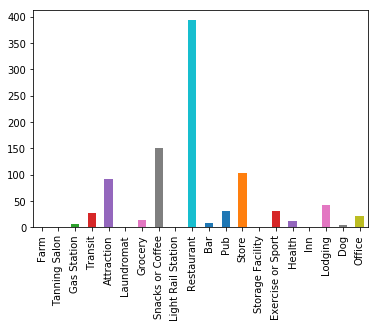

In [256]:
dfVanLocVenues['Venue Category Simplified'].value_counts(sort=False).plot.bar()
# dfVanLocVenues['Venue Category Simplified'].nunique()

### Cluster neighborhoods

To determine if there are neighborhoods that are so close together that it can be considered as one cluster in the future. 

In [237]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 10

van_grouped_clustering = vancouver_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(van_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([7, 9, 9, 5, 3, 2, 0, 6, 0, 6])

Create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [238]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [246]:

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = vancouver_grouped['Neighborhood']

for ind in np.arange(vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vancouver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = dfVanLoc.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
# manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

vancouver_merged.head() # check the first columns!

,City,Latitude,Longitude,Neighborhood,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Vancouver,49.281718,-123.040006,(North Hastings-Sunrise),V5K,6,Venue Count,Attraction,Restaurant,Snacks or Coffee,Exercise or Sport
1,Vancouver,49.280201,-123.066563,(North Grandview-Woodland),V5L,0,Venue Count,Restaurant,Snacks or Coffee,Store,Transit
2,Vancouver,49.260078,-123.040160,(South Hastings-Sunrise / North Renfrew-Collin...,V5M,5,Venue Count,Store,Restaurant,Transit,Snacks or Coffee
3,Vancouver,49.264625,-123.065869,(South Grandview-Woodland / NE Kensington-Ceda...,V5N,4,Venue Count,Restaurant,Snacks or Coffee,Store,Pub
4,Vancouver,49.222751,-123.067561,(SE Kensington-Cedar Cottage / Victoria-Fraser...,V5P,5,Venue Count,Restaurant,Store,Office,Gas Station


### Display Clustered Neighborhoods and tooltip shows which cluster it is in

In [247]:
# create map
map_clusters = folium.Map(location=[dfVanLoc.iloc[0]['Latitude'], dfVanLoc.iloc[0]['Longitude']], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighborhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Now pull in Paris venues

In [45]:
paris_venues = getNearbyVenues(dfPar['Neighborhood'], dfPar['Latitude'], dfPar['Longitude'])

In [46]:
dfParLocVenues = simplifyCategories(paris_venues)
print (paris_venues['Venue Category'].nunique())
print (dfParLocVenues['Venue Category Simplified'].nunique())
dfParLocVenues['Venue Category Simplified'].unique()

194
18


array(['Pub', 'Lodging', 'Restaurant', 'Attraction', 'Store', 'Grocery',
       'Snacks or Coffee', 'Office', 'Church', 'Bar', 'Health',
       'Exercise or Sport', 'General College & University', 'Transit',
       'Dog', 'Skating Rink', 'Martial Arts School', 'Cemetery'],
      dtype=object)

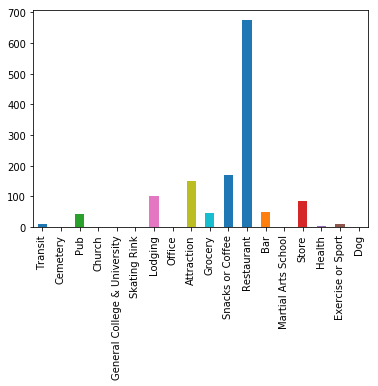

In [257]:
dfParLocVenues['Venue Category Simplified'].value_counts(sort=False).plot.bar()
# dfParLocVenues['Venue Category Simplified'].nunique()

In [47]:
# one hot encoding
paris_onehot = pd.get_dummies(dfParLocVenues[['Venue Category Simplified']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = dfParLocVenues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
paris_grouped = paris_onehot.groupby('Neighborhood').sum().reset_index()

paris_grouped['Venue Count'] = paris_grouped.iloc[:, 1:].sum(axis=1)
# print (paris_grouped.columns)

In [48]:
dfVanLoc.columns

Index(['City', 'Latitude', 'Longitude', 'Neighborhood', 'Postal Code'], dtype='object')

In [49]:
dfPar.columns

Index(['Postal Code', 'Neighborhood', 'City', 'Latitude', 'Longitude',
       'Population', 'Density', 'Cost of Living'],
      dtype='object')

In [188]:
dfVanPop = pd.read_csv('Vancouver_Population.csv')
dfVanLocPop = pd.merge(dfVanLoc, dfVanPop, how="left", on="Postal Code")

dfVanLocVenPop = pd.merge(dfVanLocPop, vancouver_grouped, how="left", on="Neighborhood")

dfVanLocVenPop.head()

,City,Latitude,Longitude,Neighborhood,Postal Code,Population,Cost of Living,Attraction,Bar,Dog,...,Lodging,Office,Pub,Restaurant,Snacks or Coffee,Storage Facility,Store,Tanning Salon,Transit,Venue Count
0,Vancouver,49.281718,-123.040006,(North Hastings-Sunrise),V5K,23016,6600,15,0,0,...,0,0,0,5,1,0,0,0,0,25
1,Vancouver,49.280201,-123.066563,(North Grandview-Woodland),V5L,19720,6600,2,0,1,...,0,0,2,11,6,1,4,0,2,29
2,Vancouver,49.260078,-123.040160,(South Hastings-Sunrise / North Renfrew-Collin...,V5M,23053,6600,1,0,0,...,0,1,0,4,3,0,9,0,4,22
3,Vancouver,49.264625,-123.065869,(South Grandview-Woodland / NE Kensington-Ceda...,V5N,35045,6600,2,0,0,...,0,0,2,23,6,0,4,0,1,42
4,Vancouver,49.222751,-123.067561,(SE Kensington-Cedar Cottage / Victoria-Fraser...,V5P,31920,6600,1,0,0,...,0,2,0,11,0,0,3,0,1,21


In [187]:
dfParLocVenPop = pd.merge(dfPar, paris_grouped, how="left", on="Neighborhood")
dfParLocVenPop.head()

,Postal Code,Neighborhood,City,Latitude,Longitude,Population,Density,Cost of Living,Attraction,Bar,...,Lodging,Martial Arts School,Office,Pub,Restaurant,Skating Rink,Snacks or Coffee,Store,Transit,Venue Count
0,75001,1er Arrondissement,Paris,48.855997,2.337999,25049,17924,7334,12,1,...,10,0,1,7,44,0,13,7,0,100
1,75002,2eme Arrondissement,Paris,48.867600,2.343900,25049,17924,7334,9,3,...,3,0,0,7,51,0,16,8,0,100
2,75003,3eme Arrondissement,Paris,48.863500,2.359100,25049,17924,7334,12,3,...,3,0,0,2,50,0,15,5,0,96
3,75004,4eme Arrondissement,Paris,48.856600,2.352200,25049,17924,7334,19,2,...,3,0,0,5,33,0,23,14,0,100
4,75005,5eme Arrondissement,Paris,48.840800,2.351900,59631,23477,7334,8,3,...,6,0,0,0,37,0,10,1,0,69


#### Display markers on a map based on Venue Count

In [189]:
import numpy as np
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_venue_van = folium.Map( location=[ dfVanLocVenPop.iloc[0]['Latitude'], dfVanLocVenPop.iloc[0]['Longitude'] ], zoom_start = 11 )

max_venue_count = dfVanLocVenPop['Venue Count'].max()

# set color scheme for the clusters
x = np.arange(max_venue_count_par)
ys = [i + x + (i*x)**2 for i in range(max_venue_count)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, venue in zip(dfVanLocVenPop['Latitude'], dfVanLocVenPop['Longitude'], dfVanLocVenPop['Neighborhood'], dfVanLocVenPop['Venue Count']):
    label = folium.Popup(str(poi) + ' Venue ' + str(venue), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[venue - 1],
        fill=True,
        fill_color=rainbow[venue - 1],
        fill_opacity=0.7).add_to(map_venue_van)
#     print ('lat {}, lon {}'.format(lat, lon))
    
map_venue_van

In [190]:
# create map
map_venue = folium.Map( location=[ dfParLocVenPop.iloc[0]['Latitude'], dfParLocVenPop.iloc[0]['Longitude'] ], zoom_start = 11 )

max_venue_count = dfParLocVenPop['Venue Count'].max()

# set color scheme for the clusters
x = np.arange(max_venue_count)
ys = [i + x + (i*x)**2 for i in range(max_venue_count)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, venue in zip(dfParLocVenPop['Latitude'], dfParLocVenPop['Longitude'], dfParLocVenPop['Neighborhood'], dfParLocVenPop['Venue Count']):
    label = folium.Popup(str(poi) + ' Venue ' + str(venue), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[venue - 1],
        fill=True,
        fill_color=rainbow[venue - 1],
        fill_opacity=0.7).add_to(map_venue)
#     print ('lat {}, lon {}'.format(lat, lon))
    
map_venue

## Created the Ranking Score

The ranking score is to summarize the different factors that have been considered to review if a neighborhood is desirable or not. 

In [191]:
# Criteria and formula weighting
# High population is better. This is its weighting.
weight_pop = 0.3
# Low cost of living is better.
weight_col = 0.4
# More venues are better.
weight_ven = 0.3


In [193]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

frames = [dfVanLocVenPop, dfParLocVenPop]
dfJoined = pd.concat(frames, sort=False)

# dfVanLocVenPop.head()

dfJoined['Cost of Living Inv Norm'] = scaler.fit_transform( (1 / dfJoined[['Cost of Living']]) )

dfJoined['Population Norm'] = scaler.fit_transform( dfJoined[['Population']] )
dfJoined['Venue Count Norm'] = scaler.fit_transform( dfJoined[['Venue Count']] )

dfJoined.head()

# print ("venues {}, {}".format(min_ven, max_ven))
# print ("cost of living {}, {}".format(min_col, max_col))
# print ("population {}, {}".format(min_pop, max_pop))

,City,Latitude,Longitude,Neighborhood,Postal Code,Population,Cost of Living,Attraction,Bar,Dog,...,Venue Count,Density,Cemetery,Church,General College & University,Martial Arts School,Skating Rink,Cost of Living Inv Norm,Population Norm,Venue Count Norm
0,Vancouver,49.281718,-123.040006,(North Hastings-Sunrise),V5K,23016,6600,15,0,0,...,25,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.097866,0.234694
1,Vancouver,49.280201,-123.066563,(North Grandview-Woodland),V5L,19720,6600,2,0,1,...,29,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.083851,0.275510
2,Vancouver,49.260078,-123.040160,(South Hastings-Sunrise / North Renfrew-Collin...,V5M,23053,6600,1,0,0,...,22,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.098024,0.204082
3,Vancouver,49.264625,-123.065869,(South Grandview-Woodland / NE Kensington-Ceda...,V5N,35045,6600,2,0,0,...,42,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.149015,0.408163
4,Vancouver,49.222751,-123.067561,(SE Kensington-Cedar Cottage / Victoria-Fraser...,V5P,31920,6600,1,0,0,...,21,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.135727,0.193878


In [194]:
# dfVanLocVenPop['Rank'] = ( (dfVanLocVenPop['Population'] / max_pop * weight_pop) + (dfVanLocVenPop['Cost of Living'] / max_col * weight_col) + (dfVanLocVenPop['Venue Count'] / max_ven * weight_ven) )
# dfParLocVenPop['Rank'] = ( (dfParLocVenPop['Population'] / max_pop * weight_pop) + (dfParLocVenPop['Cost of Living'] / max_col * weight_col) + (dfParLocVenPop['Venue Count'] / max_ven * weight_ven) )

dfJoined['Rank'] = (dfJoined['Population Norm']  * weight_pop) + (dfJoined['Cost of Living Inv Norm']  * weight_col) + (dfJoined['Venue Count Norm']  * weight_ven)
dfJoined['Rank'] = (dfJoined['Population Norm']  * weight_pop) + (dfJoined['Cost of Living Inv Norm']  * weight_col) + (dfJoined['Venue Count Norm']  * weight_ven)


## Display the Ranking Results based on formula

In [200]:
# dfRanks = dfVanLocVenPop['Rank'].append( dfParLocVenPop['Rank']).reset_index(drop = True)
# dfRanksSorted = dfRanks.sort_values().reset_index()
# print ( dfRanksSorted[ dfRanksSorted['Rank'] >= 0.398821 ].index.values[0] )

dfRanksSorted = dfJoined['Rank'].sort_values().reset_index()
count_rank = dfRanksSorted['Rank'].count()

dfVanSliced = dfJoined[ dfJoined['City'] != 'Paris']
dfParSliced = dfJoined[ dfJoined['City'] == 'Paris']
# dfJoined['Rank']

In [201]:
# create map
map_van = folium.Map( location=[ dfVanSliced.iloc[0]['Latitude'], dfVanSliced.iloc[0]['Longitude'] ], zoom_start = 11 )

# set color scheme for the clusters
x = np.arange( count_rank )
ys = [i + x + (i*x)**2 for i in range(count_rank)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, rank in zip(dfVanSliced['Latitude'], dfVanSliced['Longitude'], dfVanSliced['Neighborhood'], dfVanSliced['Rank']):
    label = folium.Popup(str(poi) + ' rank ' + "{:10.2f}".format(rank*100), parse_html=True)
    
    index_rank = int( dfRanksSorted[ dfRanksSorted['Rank'] >= rank ].index.values[0] )
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[index_rank],
        fill=True,
        fill_color=rainbow[index_rank],
        fill_opacity=0.7).add_to(map_van)
#     print ('lat {}, lon {}'.format(lat, lon))
    
map_van

In [202]:
# create map
map_venue = folium.Map( location=[ dfParSliced.iloc[0]['Latitude'], dfParSliced.iloc[0]['Longitude'] ], zoom_start = 11 )

# set color scheme for the clusters
x = np.arange(count_rank)
ys = [i + x + (i*x)**2 for i in range(count_rank)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, rank in zip(dfParSliced['Latitude'], dfParSliced['Longitude'], dfParSliced['Neighborhood'], dfParSliced['Rank']):
    label = folium.Popup(str(poi) + ' rank ' + "{:10.2f}".format(rank*100), parse_html=True)
    
    index_rank = int( dfRanksSorted[ dfRanksSorted['Rank'] >= rank ].index.values[0] )

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[index_rank],
        fill=True,
        fill_color=rainbow[index_rank],
        fill_opacity=0.7).add_to(map_venue)
#     print ('lat {}, lon {}'.format(lat, lon))
    
map_venue

## CONCLUSION
The best neighborhoods are identified by areas that have access to a variety of venues, with a population that can sustain the economy, while having a lower cost of living. 

After analysis and priority weighting, the resulting assessment is:

In [258]:
dfJoinedSorted = dfJoined.sort_values(['Rank'])
print ( "The city of {} and neighborhood of {} is the better place to live.".format(dfJoinedSorted.iloc[-1].City, dfJoinedSorted.iloc[-1].Neighborhood) )


The city of Vancouver and neighborhood of (NE Downtown / Gastown / Harbour Centre / International Village / Victory Square / Yaletown) is the best place to live.
